100%|██████████| 122/122 [00:02<00:00, 41.20it/s]


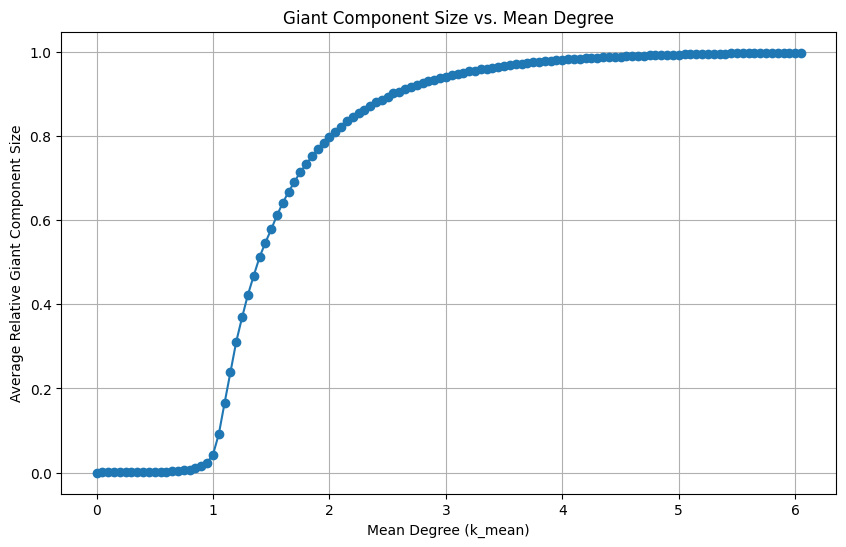

In [6]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from tqdm import tqdm

N = 10000

def generate_degree_sequence(N, k_mean, distribution='poisson', **kwargs):
    if distribution == 'poisson':
        degrees = np.random.poisson(k_mean, N)
    elif distribution == 'powerlaw':
        # Example for power-law distribution
        a = kwargs.get('exponent', 2.5)  # exponent parameter
        xmin = kwargs.get('xmin', 1)
        degrees = (np.random.pareto(a, N) + 1) * xmin
        degrees = degrees.astype(int)
    else:
        raise ValueError("Unsupported distribution type.")
    # Ensure no negative degrees
    degrees = np.maximum(degrees, 0)
    return degrees

def compute_giant_size(k_mean):
    giant_component_sizes = []
    for _ in range(num_repeats):
        # Generate degree sequence
        degrees = generate_degree_sequence(N, k_mean, distribution='poisson')

        # Adjust the degree sequence to ensure sum of degrees is even
        if np.sum(degrees) % 2 != 0:
            idx = np.random.randint(0, N)
            degrees[idx] += 1

        # Generate the configuration model graph using igraph
        G = ig.Graph.Degree_Sequence(degrees, method="configuration")

        # Remove self-loops and multiple edges
        G.simplify(multiple=True, loops=True)

        # Compute the size of the largest connected component
        clusters = G.connected_components()
        giant_size = max(clusters.sizes())
        giant_component_sizes.append(giant_size)

    # Compute the average giant component size for this k_mean
    avg_giant_size = np.mean(giant_component_sizes)
    return avg_giant_size / N

k_mean_values = np.arange(0, 6.1, 0.05)  # Mean degrees from 0 to 3
num_repeats = 40  # Number of repetitions for each k_mean

# Parallel computation using joblib
giant_sizes = Parallel(n_jobs=-1)(
    delayed(compute_giant_size)(k_mean) for k_mean in tqdm(k_mean_values)
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_mean_values, giant_sizes, marker='o')
plt.xlabel('Mean Degree (k_mean)')
plt.ylabel('Average Relative Giant Component Size')
plt.title('Giant Component Size vs. Mean Degree')
plt.grid(True)
plt.show()


In [13]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from tqdm import tqdm

N = 4000

def generate_degree_sequence(N, k_mean, distribution='poisson', **kwargs):
    if distribution == 'poisson':
        degrees = np.random.poisson(k_mean, N)
    elif distribution == 'powerlaw':
        # Example for power-law distribution
        a = kwargs.get('exponent', 2.5)  # exponent parameter
        xmin = kwargs.get('xmin', 1)
        degrees = (np.random.pareto(a, N) + 1) * xmin
        degrees = degrees.astype(int)
    else:
        raise ValueError("Unsupported distribution type.")
    # Ensure no negative degrees
    degrees = np.maximum(degrees, 0)
    return degrees

def compute_giant_size_and_clustering(k_mean):
    giant_component_sizes = []
    clustering_coeffs = []
    for _ in range(num_repeats):
        # Generate degree sequence
        degrees = generate_degree_sequence(N, k_mean, distribution='poisson')

        # Adjust the degree sequence to ensure sum of degrees is even
        if np.sum(degrees) % 2 != 0:
            idx = np.random.randint(0, N)
            degrees[idx] += 1

        # Generate the configuration model graph using igraph
        G = ig.Graph.Degree_Sequence(degrees, method="configuration")

        # Remove self-loops and multiple edges
        G.simplify(multiple=True, loops=True)

        # Compute the size of the largest connected component
        clusters = G.connected_components()
        giant_size = max(clusters.sizes())
        giant_component_sizes.append(giant_size)

        # Compute the average clustering coefficient
        clustering = ig.transitivity(G)
        clustering_coeffs.append(clustering)

    # Compute the average giant component size and clustering coefficient for this k_mean
    avg_giant_size = np.mean(giant_component_sizes) / N
    avg_clustering = np.mean(clustering_coeffs)
    return avg_giant_size, avg_clustering

k_mean_values = np.arange(0, 3.1, 0.05)  # Mean degrees from 0 to 3
num_repeats = 500  # Number of repetitions for each k_mean

# Parallel computation using joblib
results = Parallel(n_jobs=-1)(
    delayed(compute_giant_size_and_clustering)(k_mean) for k_mean in tqdm(k_mean_values)
)

# Unpack the results
giant_sizes, clustering_coeffs = zip(*results)

# Plot the average giant component size
plt.figure(figsize=(10, 6))
plt.plot(k_mean_values, giant_sizes, marker='o')
plt.xlabel('Mean Degree (k_mean)')
plt.ylabel('Average Relative Giant Component Size')
plt.title('Giant Component Size vs. Mean Degree')
plt.grid(True)
plt.show()

# Plot the average clustering coefficient
plt.figure(figsize=(10, 6))
plt.plot(k_mean_values, clustering_coeffs, marker='o', color='red')
plt.xlabel('Mean Degree (k_mean)')
plt.ylabel('Average Clustering Coefficient')
plt.title('Clustering Coefficient vs. Mean Degree')
plt.grid(True)
plt.show()


AttributeError: module 'igraph' has no attribute 'transitivity'